#### Telco Classification Analysis
**Artifact: Working Jupyter Notebook**

Presenter: Mijail Q. Mariano

Thursday, July 14th 2022

----


**Required Libraries & Modules**

In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
from skimpy import clean_columns
import numpy as np

# visualization modules:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams["figure.dpi"] = 300

# created data acquisition/preparation modules
from acquire import get_telco_data, model_features
from prepare import clean_telco_data, train_validate_test_split, dummy_columns

# sql env file
import env
from env import user, password, host, get_connection

**<u>Project Objective(s): Identify Drivers of Customer Churn</u>** 

**[ ]** Use visualizations and statistical tests to identify potential influencers of customer **churn**

**[ ]** Use statistically significant features to design a predictive model to identify customers likely to churn

**[ ]** Summarize findings and offer intervention recommendations that can help customers from ending their service  

<u>*The term "churn" in this analysis is defined as both:*</u>

    1. Customers who have elected to end their service commitments with the telco company - as indicated in the "telco" dataset (past-tense) 

    2.  Under prescribed conditions, churn will also be defined as predictions of customers who may end their services with the telco company at some future date (future-tense)

----
**[In Brief]** Data Insights from Storytelling Module

Month-to-Month customers churn at higher rates than 1 & 2 year contract customers

Fiber Optic customers are more likely to churn than DSL & No Internet Customers

Customers WITHOUT dependents churn more than customers WITH dependents

Customers who pay/paid with Electronic-checks appear more likely to churn than customers who pay with other monthly payment methods

    - Mailed Check
    - Bank Transfer (automatic payment)
    - Credit Card (automatic payment)

----
**[Initial Hypotheses]**

```Internet Options```

*Is there a relationship between ```internet``` options and whether or not a customer churns?*

* Internet account customers are disastisfied with the current internet options. Fiber Optic specifically appears to be incompatibale with other market rates or speeds. Since Fiber Optic is typically a better performing option over DSL, customers are reluctant to give DSL a try and therefore terminate services entirely with the company. 

```Streaming Movies Option```

*Is there a relationship between the ```streaming movies``` option and whether or not a customer churns?*

* Customers who regularly rely on streaming movies as their main source of entertainment - may be more inclined to remain with the Telco company than those who dont stream movies. Additionally, there may be exclusive movie streaming packages only found with the Telco company which makes churning to another competitor less attractive to customers.

```Tech Support Option```

*Is there a relationship between the ```tech support``` option and whether or not a customer churns?*

* Internet service customers who opt for the tech support option are less likely to churn than those without. Since tech support can be a key facilitator in helping customers during difficult times, customers with tech support may see this option as a helpful alternative before making a decision to churn.


```Monthly Payment Options```

*Is there a relationship between ```monthly payment``` options and whether or not a customer churns?*

* Customers who opt to pay their monthly charges via electronic check (E-check) are more likely to churn. This is possibly due to E-checks requiring additional steps such as login into a third-party website and paying additional fees for clearing their payment to Telco.


**<u>Takeaways</u>**

Hypothesis testing during exploration showed that customer churn holds a statistically significant relationship with features such as ```internet_type```, ```tech_support```, ```streaming_movies```, and ```payment_type```.

<center>
<table>
  <thead>
    <tr>
      <th>Data Feature</th>
      <th>Statistical Test</th>
      <th>Degress of Freedom</th>
      <th>P-value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>internet_type</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>tech_support</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>streaming_movies</td>
      <td>ChiSquared</td>
      <td>6</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>payment_type</td>
      <td>ChiSquared</td>
      <td>8</td>
      <td>0.00</td>
  </tbody>
</table>
</center>

When examined against churn, these features returned $\chi^2$ (chiSquared) tests with variability significantly different amongst observed frequency and expected frequency. This infers that there is a dependency among these features and customer's decision to churn.

**<u>Recommendations</u>**

1. Work to improve internet speeds and reliability - specifically across Fiber Optic infrastructure as this option appears to have a stronger statistical relationship to customer churn than the DSL option.
   
2. Encourage internet service customers to opt for the tech_support option in order to help remedy real-time internet issues, and/or provide customers an alternative internet option such as DSL in critical moments.

3. Eliminate Electronic Check ("E-Check") as a monthly payment option as this appears to have a relatively strong statistical association to customer churn & higher churn rates than DSL. This is possibly due to customers taking additional steps such as loging into a third-party website to pay their monthly bill and paying an additional fee for clearing the electronic check. 

4. Although streaming movies is very closely associated with whether or not a customer has internet with the company, it's still worth noting that more than 1/3 of all customers have chosen this option. Of which, these customers also churn at less rates than customers who have not chosen to stream movies. 

    - My recommendation here would be to partner with leading film / streaming platforms to create selective releases only with the telco company and adverstise to non-movie streaming customers. By diversifying the movie streaming options, you potentially appeal to more customers. 

----
### ```Data Acquisition & Preparation:```

* Telco Dataset: (7043 rows, 24 Features)
* Telco Dataset w/Dummy Variables: (7043 rows, 62 columns)

In [2]:
# importing and cleaning telco dataset

df = get_telco_data()
df = clean_telco_data(df)
df = dummy_columns(df)
df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_no_internet_service,payment_type_bank_transfer_automatic,payment_type_credit_card_automatic,payment_type_e_check,payment_type_mailed_check,contract_type_month_to_month,contract_type_one_year,contract_type_two_year,gender_female,gender_male,partner_no,partner_yes,dependents_no,dependents_yes,phone_service_no,phone_service_yes,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes,online_backup_no,online_backup_no_internet_service,online_backup_yes,device_protection_no,device_protection_no_internet_service,device_protection_yes,tech_support_no,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,False,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,False,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,No,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,False,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,No,Yes,No,No,No,No,No,Yes,48.20,340.35,False,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,False,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


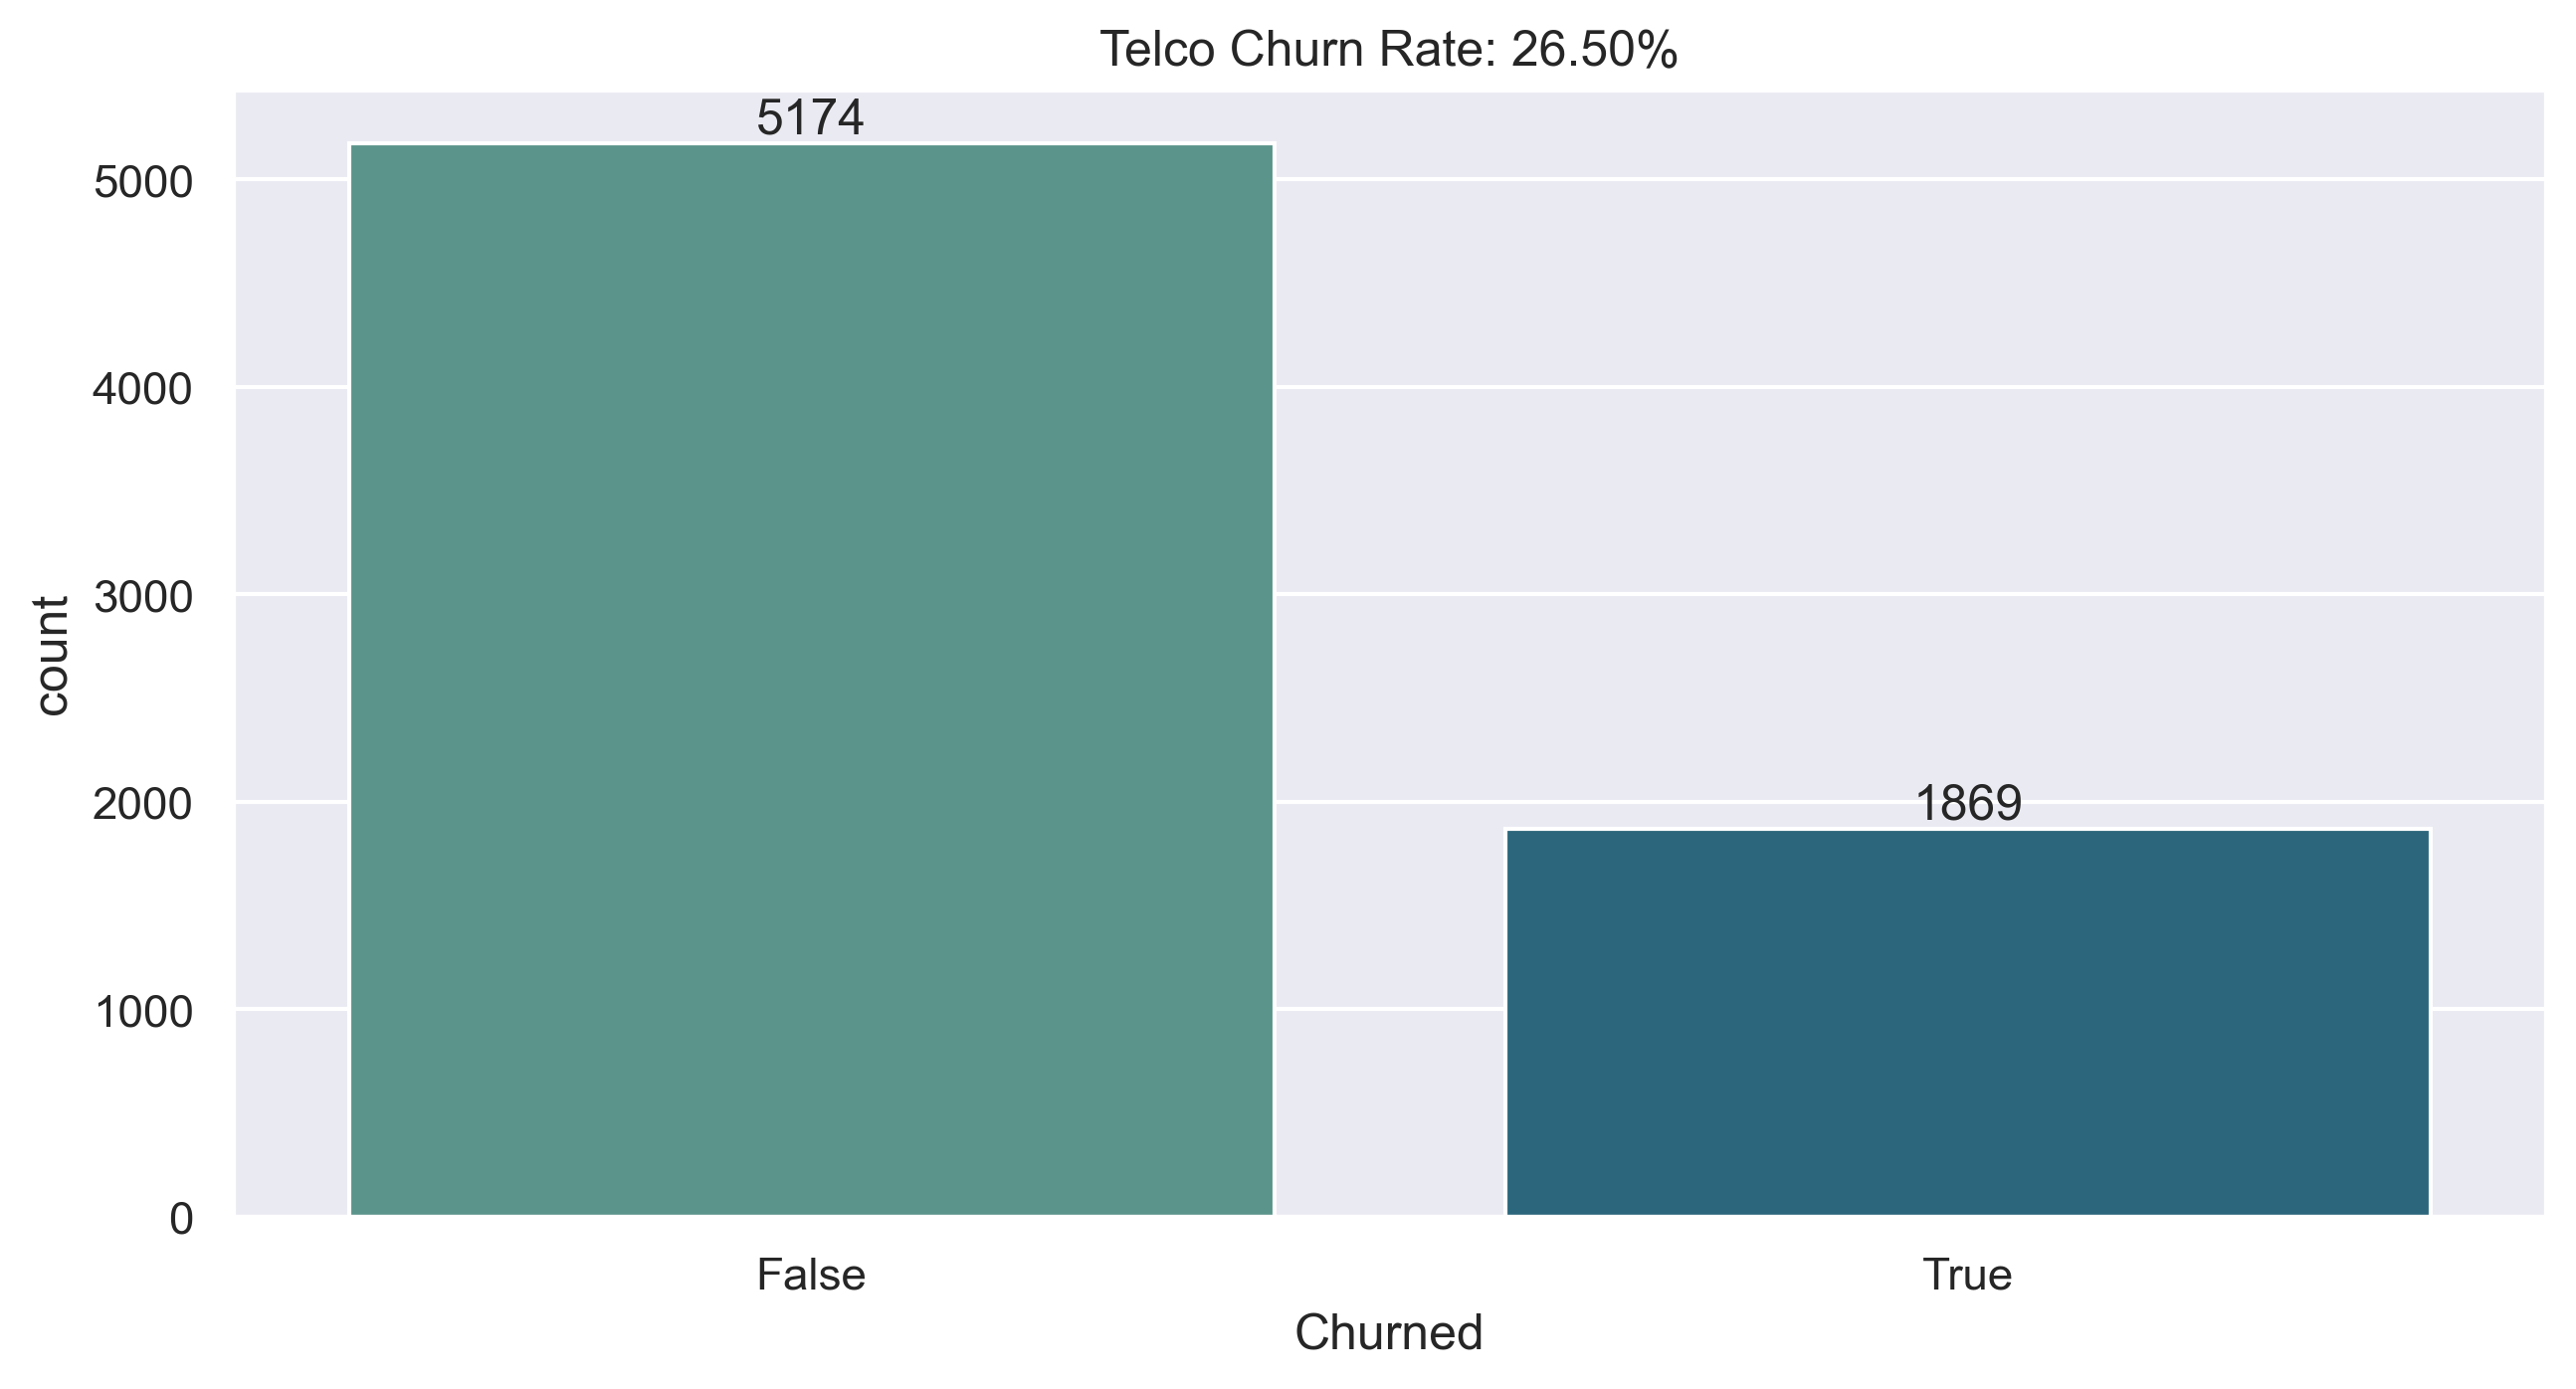

In [3]:
# plotting total number churned and churn % rate
churn_rate = round(df["churn"].mean(), 3)

sns.set(font_scale = 1)
ax = sns.countplot(x = "churn", 
    data = df,
    order = df["churn"].value_counts().index,
    palette = "crest")

ax.bar_label(ax.containers[0])

plt.xticks(rotation = 0)
plt.title(f"Telco Churn Rate: {churn_rate:.2%}")
plt.xlabel("Churned")
plt.show()

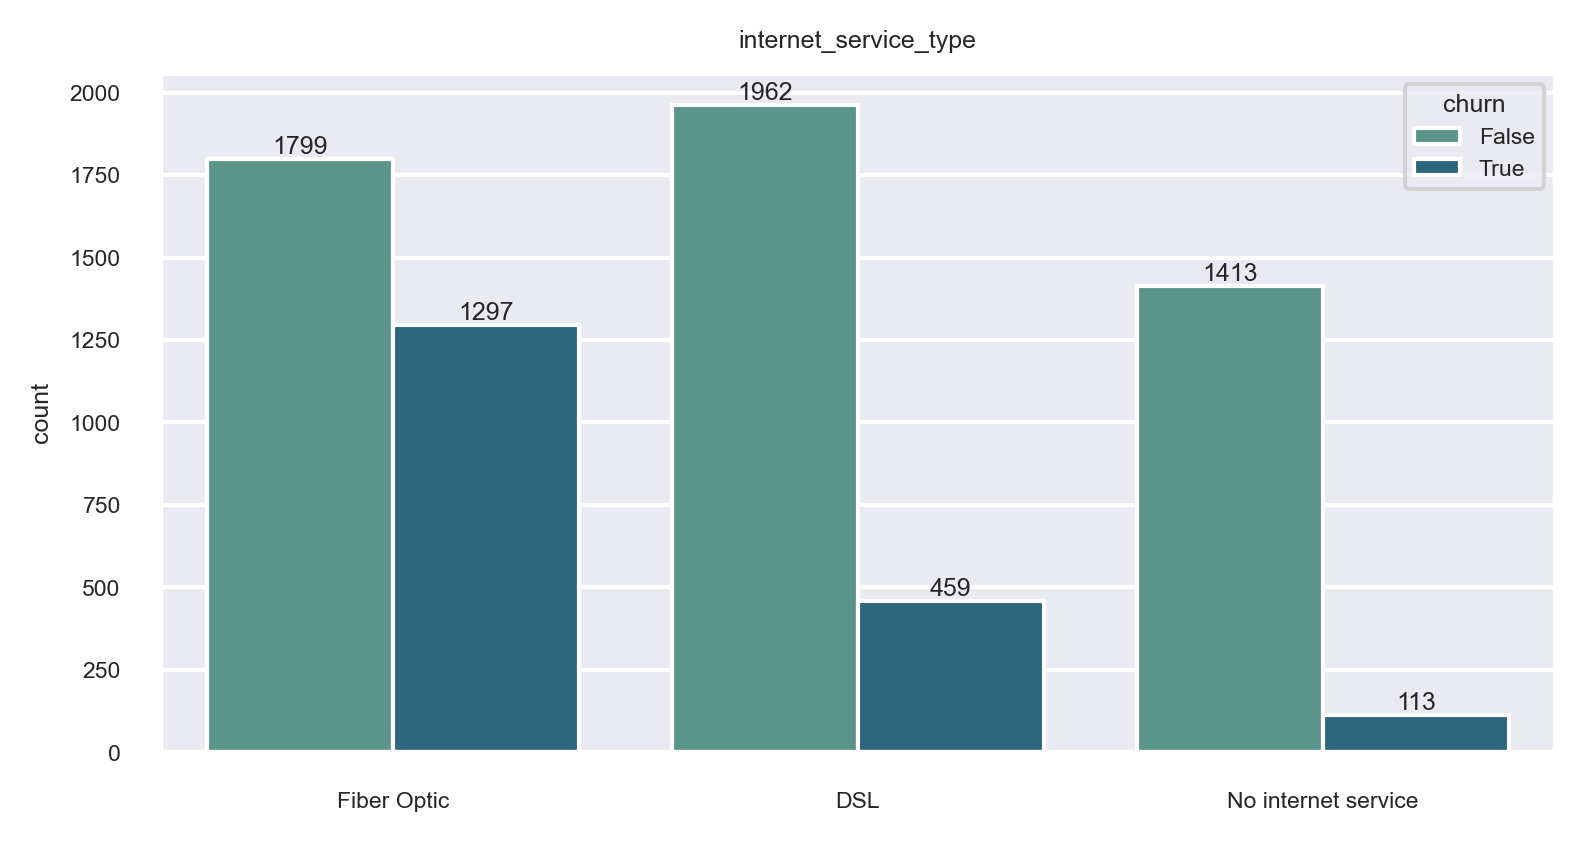

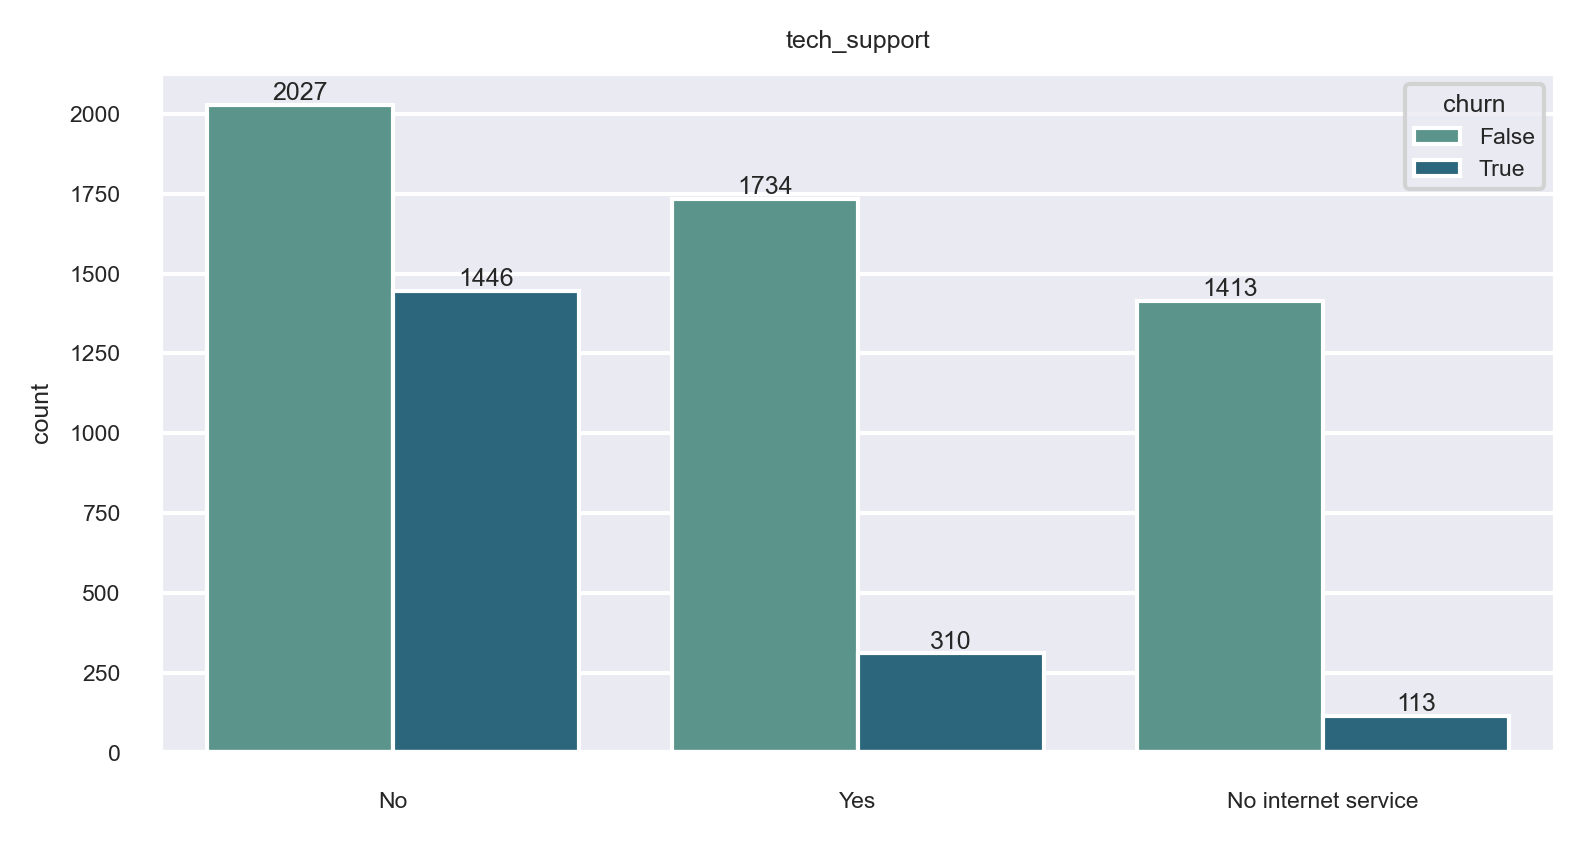

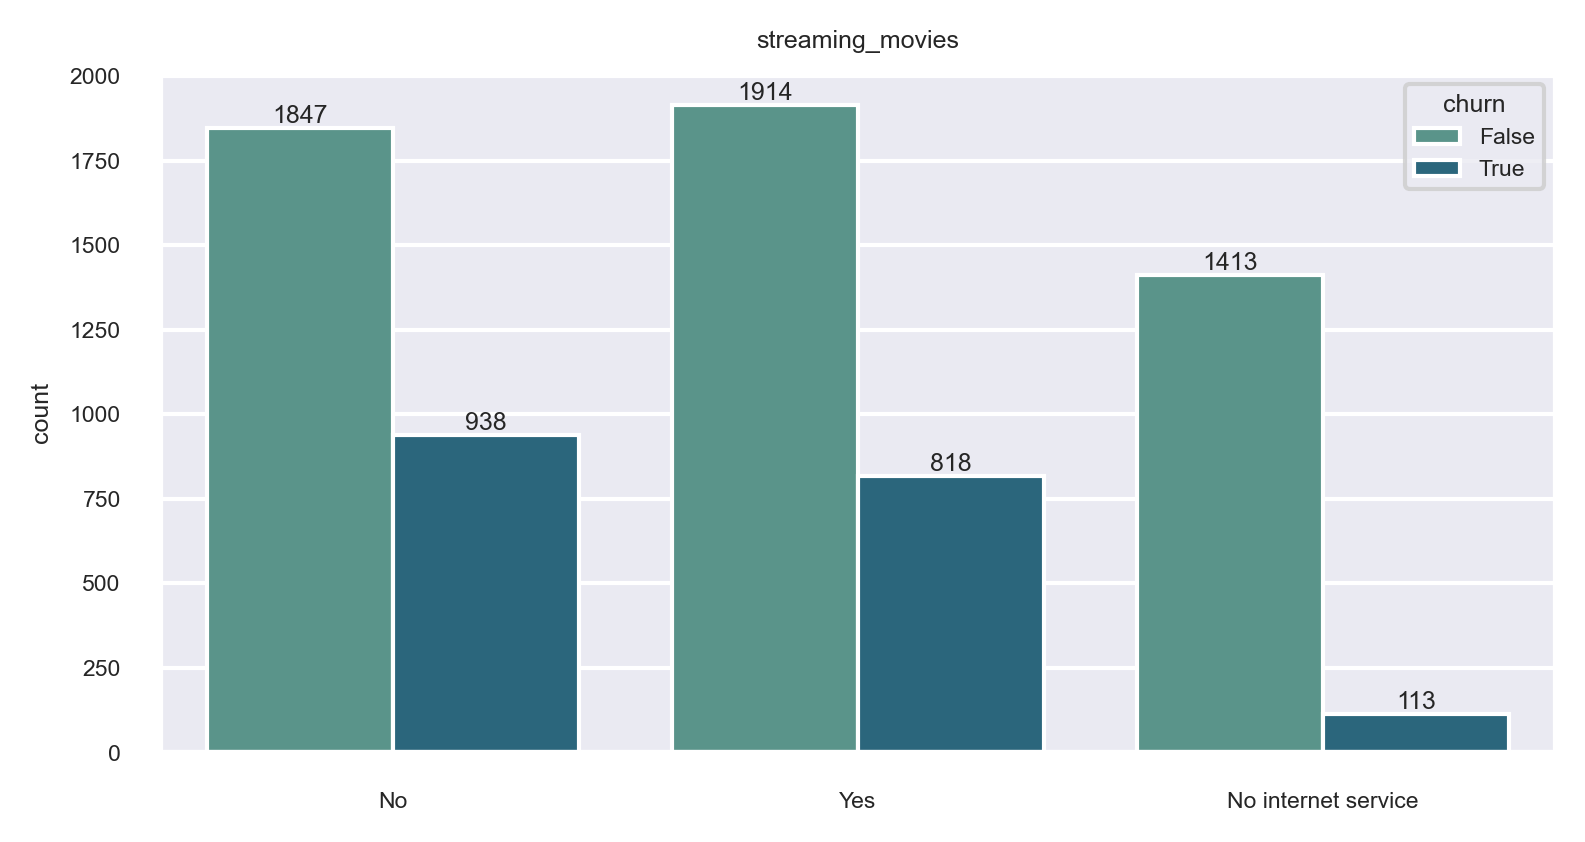

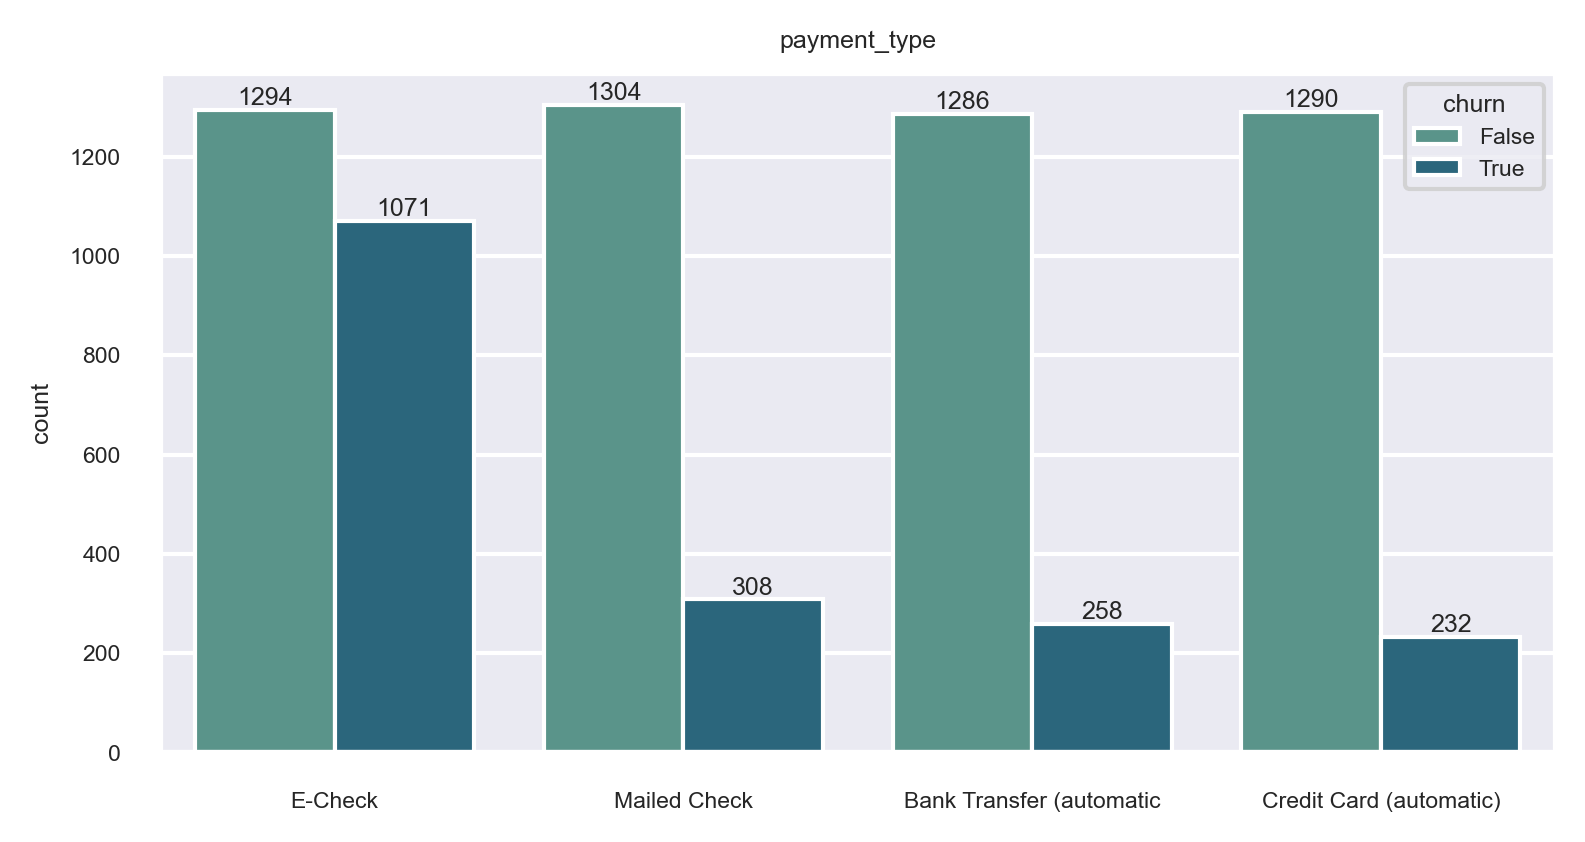

In [4]:
# viewing tested features by churn and non-churn customers

cols = df[["internet_service_type", "tech_support", "streaming_movies", "payment_type"]]
for column in cols:
    plt.figure(figsize=(6, 3))
    sns.set(font_scale = 0.5)
    ax = sns.countplot(x = column, \
                hue = "churn", \
                data = df,
                order = df[column].value_counts().index,
                palette = "crest")
    ax.set(xlabel = None)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(column)
    plt.show()

```Conclusion:``` Based on these plots, I was able to conclude that my initial assumptions of the four (4) identified features were correct. Solely focusing on features not previously explored, we see that internet customers without Telco's ```"tech support"``` option churned at slightly higher rates than those with tech support. Additionally, customers who ```did not stream movies``` also churned significantly more than customers who do.

----
#### <u>Preparing Datasets for Hypothesis Testing</u>

**Dataset Breakdown:**

**Telco DF** split.....80% train / 20% ```TEST```

**Train DF** split.....70% ```TRAIN``` / 30% ```VALIDATE```

In [5]:
train, validate, test = train_validate_test_split(df)

print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (3943, 62)
Validate dataset shape: (1691, 62)
Test dataset shape: (1409, 62)


----
### ```Exploration:```

In [6]:
# importing necessary modules for exploration:
import scipy.stats as stats

**Variables**
 
* y = churn (dependent variable)
* X = feature (independent variable)

**Key Questions:**

1. Do the current ```Internet Options``` have an impact on customer churn?
   
    - Comparing Categorical to Categorical (Chi Squared Test) 
<br><br>
1. Does opting for the ```Tech Support``` option have an effect customer churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
3. Does how a customer pay their monthly bill/charges ```Payment Type``` have an effect on churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
4. Does whether or not a customer ```Stream Movies``` impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>

*(not tested in analysis)*

5. ~~Does whether or not a customer ```Streams TV``` impact their decision to churn?~~
6. ~~Do having ```dependents``` effect a customer's decision to churn or not?~~
7. ~~Does the ```total number of customer account options``` impact churn?~~


----
```Note:``` Since variables and analysis questions are all categorical - **hypothesis testing** required the use of $Chi^2$ testing which subsequently have underlying assumptions that must be true for testing.

$Chi^2$ Assumptions:

* Both y and X variables are independent of one another
* Each feature observation is independent of another 
* Each participant contributes to only one cell within the Chi-square table
* (ea. customer cannot be counted twice in a feature...said another way, under ```internet_type``` if a customer has "Fiber Optic", then they cannot also be recorded as "No Internet Service")
* The frequency of values of expected cells should be greater than 5

**```Feature #1: Internet_Type```**

<u>**Hypothesis Formulation:**</u>

$H_0$: "There is NO association/relationship between internet options and customer churn."

$H_a$: "There IS an association/relationship between internet options and customer churn."

$\alpha$: 0.05

```Feature Options```

- Fiber Optic
- DSL
- No Internet Service

In [7]:
alpha = 0.05

In [8]:
# generating observed table = distributions of categorical values in the train sample
observed = pd.crosstab(index = train["internet_service_type"], columns = train["churn"], margins = True)
observed

churn,False,True,All
internet_service_type,,,
DSL,1106,259,1365
Fiber Optic,1016,724,1740
No internet service,775,63,838
All,2897,1046,3943


In [9]:
# generating the ChiSquared Test and printing the results
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

print("\n","Observed Values:", "\n", observed.values)
print("--------------------------", "\n","Expected Values:", "\n", exp_values.astype(int))

print("--------------------------", "\n","chi2 =", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)

print()
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("FAIL to reject Null Hypothesis.")


 Observed Values: 
 [[1106  259 1365]
 [1016  724 1740]
 [ 775   63  838]
 [2897 1046 3943]]
-------------------------- 
 Expected Values: 
 [[1002  362 1365]
 [1278  461 1740]
 [ 615  222  838]
 [2897 1046 3943]]
-------------------------- 
 chi2 = 398.38
p_value = 0.0
Degrees of Freedom = 6

REJECT Null Hypothesis.


**Conclusion**
1. Given the relatively low p-value in the ChiSquared Test and differences in observed vs. expected observations -- I conclude with a ```95% confidence interval``` that there is an association/relationship between a customer's ```internet_type``` and their decision to churn or not.

2. This feature is carroed forward into future predictive modeling.

----

**```Feature #2: Tech_Support```**

<u>**Hypothesis Formulation:**</u>

$H_0$: "There is NO association/relationship between a customer's tech support option and their decision to churn."

$H_a$: "There IS an association/relationship between a customer's tech support option and their decision to churn.""


$\alpha$: 0.05

```Feature Options```

- ``Yes`` = has internet and ``HAS tech support``
- ``No`` = has internet but ``NO tech support``
- ``No Internet Service``

In [10]:
alpha = 0.05

In [11]:
# generating observed table = distributions of categorical values in the train sample
observed = pd.crosstab(index = train["tech_support"], columns = train["churn"], margins = True)
observed

churn,False,True,All
tech_support,,,
No,1173,817,1990
No internet service,775,63,838
Yes,949,166,1115
All,2897,1046,3943


In [12]:
# generating the ChiSquared Test and printing the results
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

print("\n","Observed Values:", "\n", observed.values)
print("--------------------------", "\n","Expected Values:", "\n", exp_values.astype(int))

print("--------------------------", "\n","chi2 =", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)

print()
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("FAIL to reject Null Hypothesis.")


 Observed Values: 
 [[1173  817 1990]
 [ 775   63  838]
 [ 949  166 1115]
 [2897 1046 3943]]
-------------------------- 
 Expected Values: 
 [[1462  527 1990]
 [ 615  222  838]
 [ 819  295 1115]
 [2897 1046 3943]]
-------------------------- 
 chi2 = 448.36
p_value = 0.0
Degrees of Freedom = 6

REJECT Null Hypothesis.


**Conclusion**
1. Given the relatively low p-value in the ChiSquared Test and differences in observed vs. expected observations -- I conclude with a ```95% confidence interval``` that there is an association/relationship between customers' who have the ```tech_support``` option and their decision to churn or not.

2. This feature is carried forward into future predictive modeling.
----

**```Feature #3: Streaming_Movies```**

<u>**Hypothesis Formulation (movie streaming):**</u>

$H_0$: "There is NO association/relationship between the stream movies option and customers' decision to churn."

$H_a$: "There IS an association/relationship between the stream movies option and customers' decision to churn."


$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

```Feature Options```

- ``Yes`` = has internet and ``has movie streaming option``
- ``No`` = has internet but ``does not have movie streaming option``
- ``No Internet Service``

In [13]:
alpha = 0.05

In [14]:
# generating observed table = distributions of categorical values in the train sample
observed = pd.crosstab(index = train["streaming_movies"], columns = train["churn"], margins = True)
observed

churn,False,True,All
streaming_movies,,,
No,1023,525,1548
No internet service,775,63,838
Yes,1099,458,1557
All,2897,1046,3943


In [15]:
# generating the ChiSquared Test and printing the results
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

print("\n","Observed Values:", "\n", observed.values)
print("--------------------------", "\n","Expected Values:", "\n", exp_values.astype(int))

print("--------------------------", "\n","chi2 =", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)

print()
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("FAIL to reject Null Hypothesis.")


 Observed Values: 
 [[1023  525 1548]
 [ 775   63  838]
 [1099  458 1557]
 [2897 1046 3943]]
-------------------------- 
 Expected Values: 
 [[1137  410 1548]
 [ 615  222  838]
 [1143  413 1557]
 [2897 1046 3943]]
-------------------------- 
 chi2 = 205.37
p_value = 0.0
Degrees of Freedom = 6

REJECT Null Hypothesis.


**Conclusion**
1. Given the relatively low p-value in the ChiSquared Test and differences in observed vs. expected observations -- I conclude with a ```95% confidence interval``` that there is an association/relationship between customers' who have the ```streaming_movies``` option and their decision to churn or not.

2. This feature is carried forward into future predictive modeling.
----

**```Feature #4: Payment_Type```**

<u>**Hypothesis Formulation (movie streaming):**</u>

$H_0$: "There is NO association/relationship between a customer's ```monthly bill payment option``` and their decision to churn."

$H_a$: "There IS an association/relationship between a customer's ```monthly bill payment option``` and their decision to churn."


$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

```Feature Options```

- Electronic Check ("E-check")
- Bank Transfer (automatic payment)
- Credit Card (automatic payment)
- Mailed Check

In [16]:
alpha = 0.05

**```Quickly visualizing payment_type options by number of months with Telco (tenure)```**

* If customers ultimately churned, this visual helped to see where in their Telco life cycle they did so

* We also see that among E-check customers, a relatively large proportion of these customers churned within the first year of being with Telco

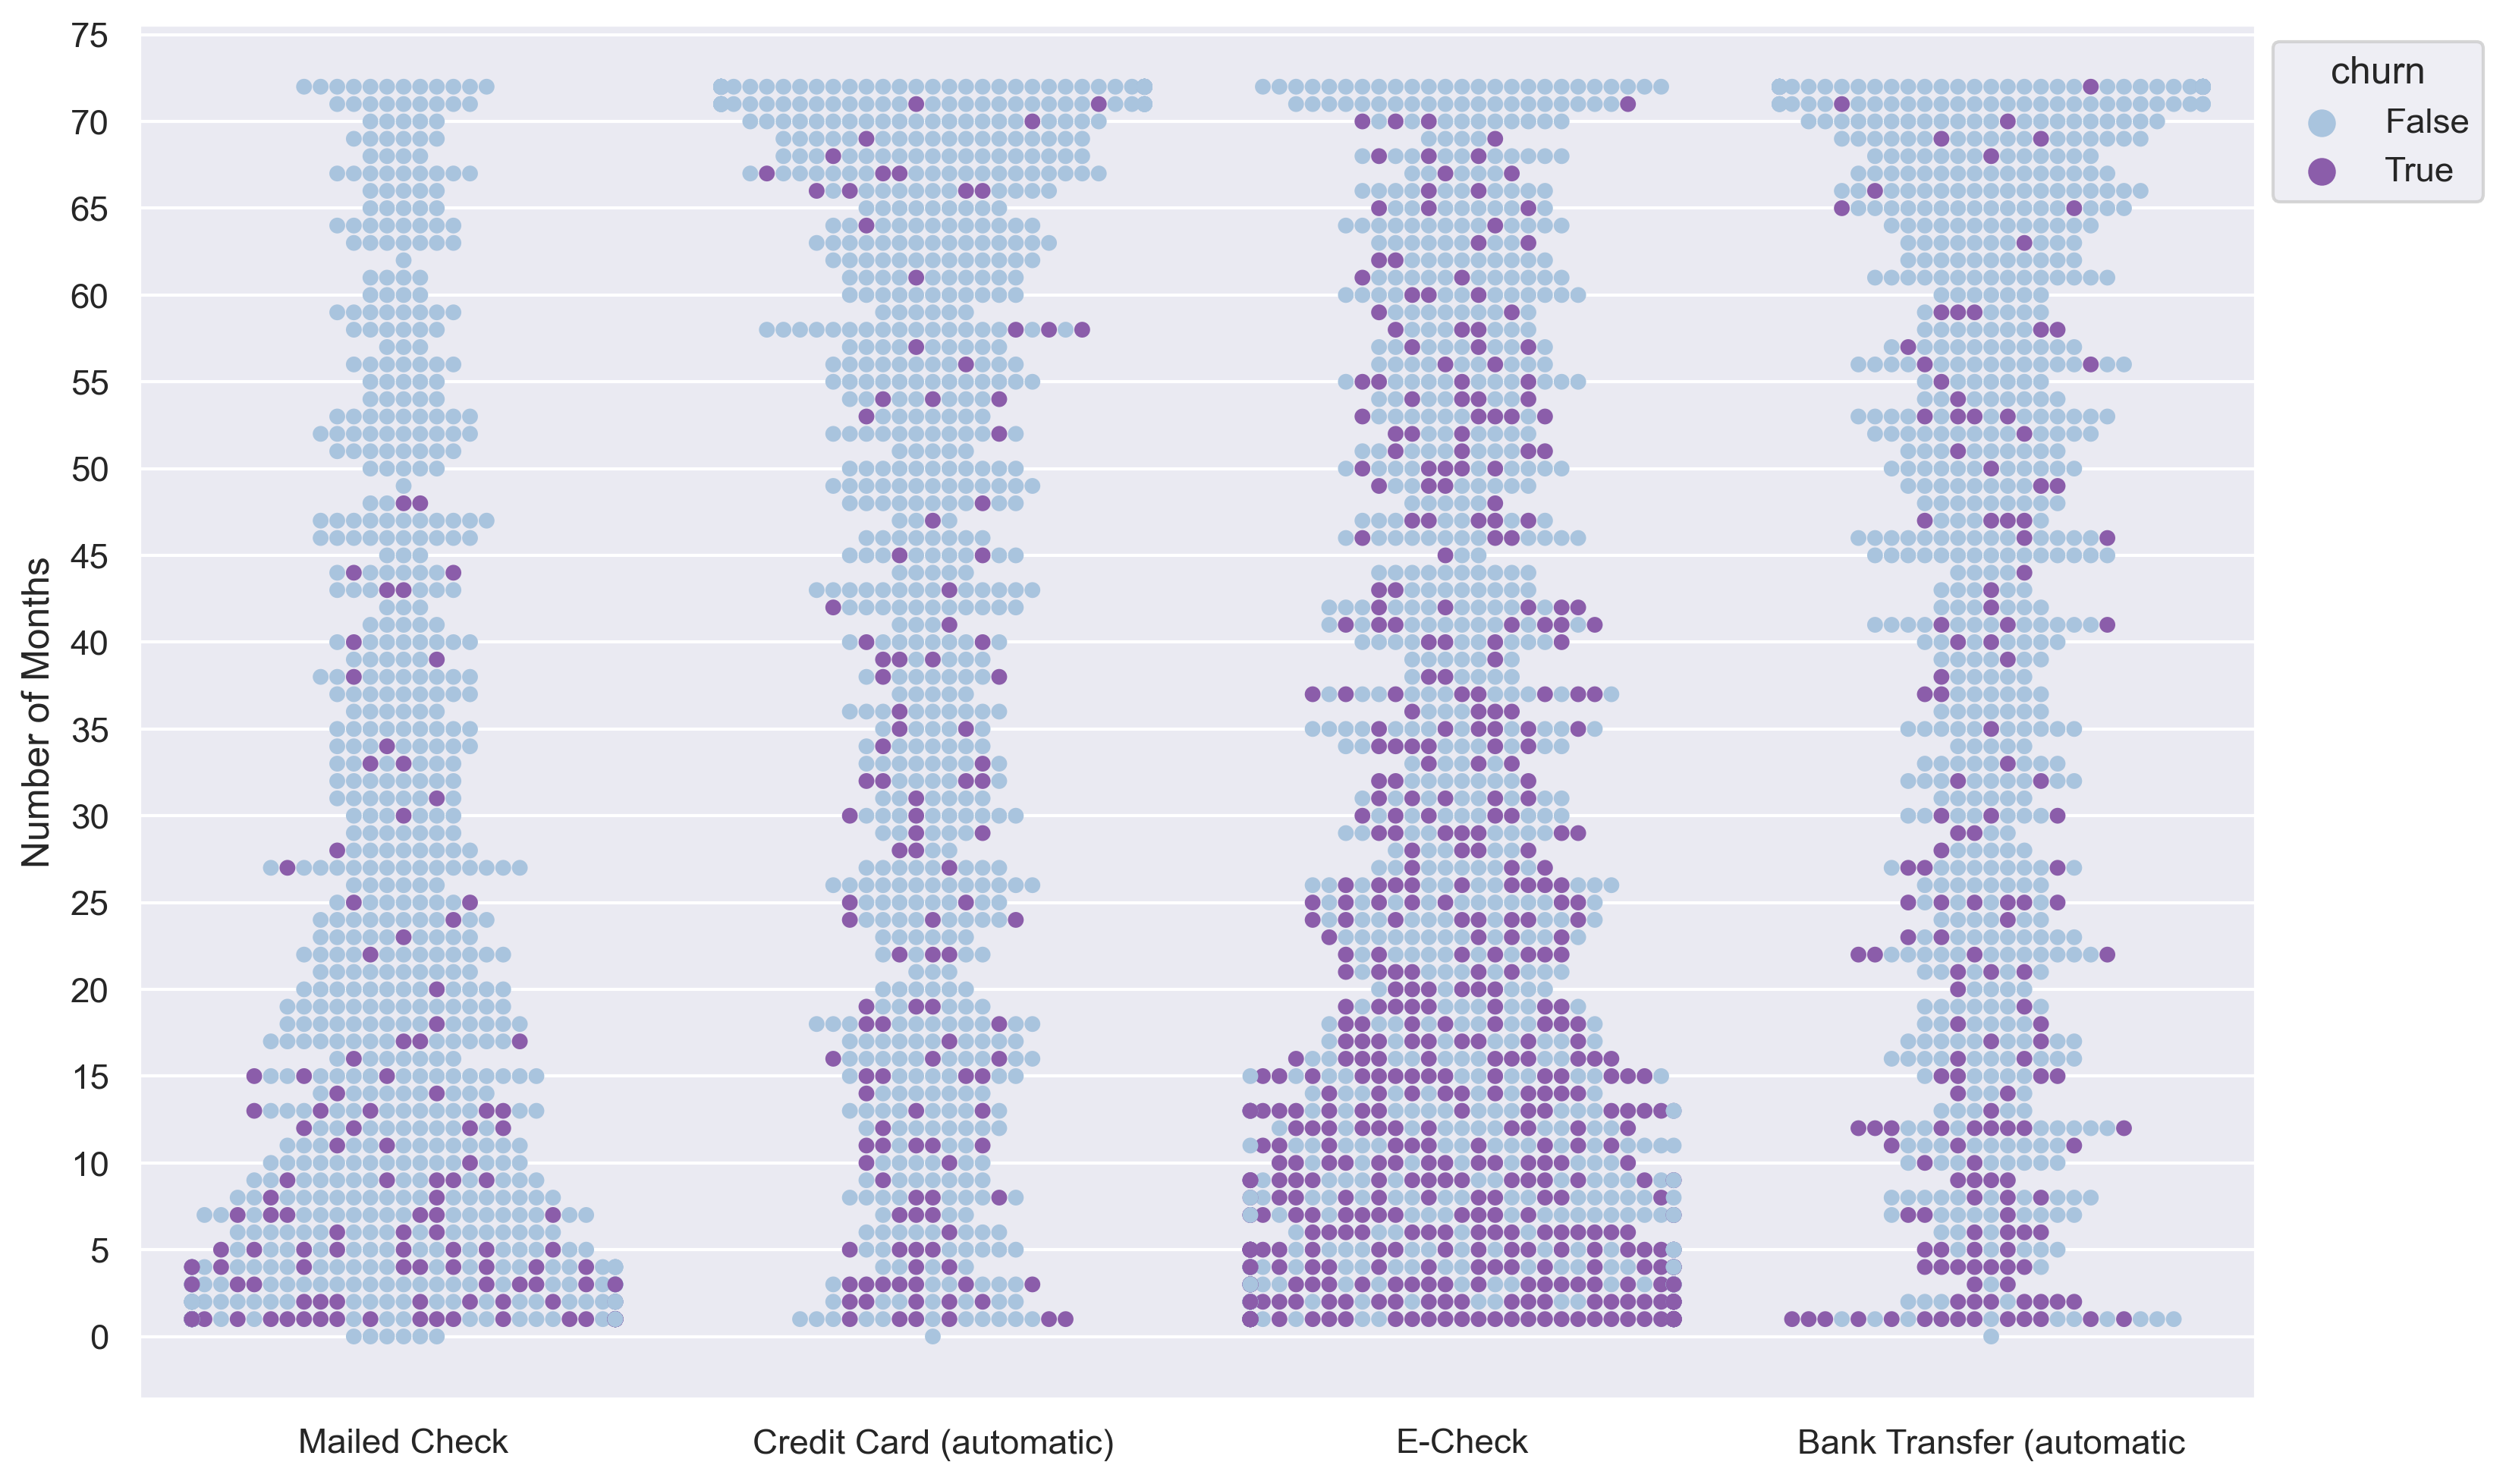

In [17]:
# payment_type sns.swarmplot
import warnings 
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 8))
y_ticks = range(75, -1, -5)
sns.set(font_scale = 1)
ax = sns.swarmplot(x = "payment_type", y = "tenure", data = train, hue = "churn", palette = "BuPu")

ax.set_xlabel(None)
ax.set_ylabel("Number of Months")
ax.set_yticks(y_ticks)
plt.legend(bbox_to_anchor=(1, 1), title = "churn")
plt.show()

In [18]:
# generating observed table = distributions of categorical values in the train sample
observed = pd.crosstab(index = train["payment_type"], columns = train["churn"], margins = True)
observed

churn,False,True,All
payment_type,,,
Bank Transfer (automatic,714,154,868
Credit Card (automatic),714,121,835
E-Check,739,611,1350
Mailed Check,730,160,890
All,2897,1046,3943


In [19]:
# generating the ChiSquared Test and printing the results
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

print("\n","Observed Values:", "\n", observed.values)
print("--------------------------", "\n","Expected Values:", "\n", exp_values.astype(int))

print("--------------------------", "\n","chi2 =", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)

print()
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("FAIL to reject Null Hypothesis.")


 Observed Values: 
 [[ 714  154  868]
 [ 714  121  835]
 [ 739  611 1350]
 [ 730  160  890]
 [2897 1046 3943]]
-------------------------- 
 Expected Values: 
 [[ 637  230  868]
 [ 613  221  835]
 [ 991  358 1350]
 [ 653  236  890]
 [2897 1046 3943]]
-------------------------- 
 chi2 = 372.85
p_value = 0.0
Degrees of Freedom = 8

REJECT Null Hypothesis.


**Conclusion**
1. Given the relatively low p-value in the ChiSquared Test and differences in observed vs. expected observations -- I conclude with a ```95% confidence interval``` that there is an association/relationship between customer ```monthly bill/charges payment options``` and their decision to churn or not.

2. This feature is carried forward into future predictive modeling.
----

### ```Modeling:```

**[Summary in Brief]**

- Since 1/2 of the features tested during exploration depended on "internet_service_type" (e.g.,both "tech support" and "streaming movies" options are dependent on whether or not a customer also had internet service with Telco), I ultimately made the decision to choose a Random Forest as my modeling techinique for two (2) primary reasons:

  1. Reduces the possibility of overfitting or biasing the model (aggregate vote of decision trees/combinations)

  2. When compared to the other two (2) distinct classification techniques tested (Logistical Regression & K-nearest Neighbor) -- the Random Forest model had the best overall prediction accuracy and reliability. 

-----

In [20]:
# modeling functions
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# reporting functions
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from acquire import log_features, model_results

In [21]:
# For the baseline accuracy, I have taken the mode of the two (2) binary "churn" options = False and have set this as my random prediction
# baseline accuracy score: the total number of times that the baseline prediction matched the actual churn outcome
# baseline accuracy score: ~74.0% **(note that if the goal is to predict churn = 1, then baseline accuracy is ~26%)

df = train
df["baseline_prediction"] = False 
baseline_acc = (df["baseline_prediction"] == df["churn"]).mean().round(3)
print(f"Baseline Accuracy: % {(baseline_acc * 100).round()}")

Baseline Accuracy: % 74.0


In [22]:
# creating new feature dataframes for modeling
# creating variable (train, validate, and test) dataframes for X and y variables
# note here that I also drop unneeded/unintended "churn" column in X variable

X_train = model_features(train).drop(columns = "churn").reset_index(drop = True)
y_train = model_features(train).churn.reset_index(drop = True)

X_validate = model_features(validate).drop(columns = "churn").reset_index(drop = True)
y_validate = model_features(validate).churn.reset_index(drop = True)

X_test = model_features(test).drop(columns = "churn").reset_index(drop = True)
y_test = model_features(test).churn.reset_index(drop = True)

In [27]:
# returning best model performance against train & validate datasets
final_results = model_results(X_train, y_train, X_validate, y_validate)
final_results

,Classification Model,train_accuracy,validate_accuracy,percent_change_diff
0,Logistic Regression,0.767690,0.762271,0.007058
1,KNN,0.745118,0.746895,-0.002385
2,Decision Tree,0.767690,0.762271,0.007058
3,Random Forest,0.767690,0.762271,0.007058


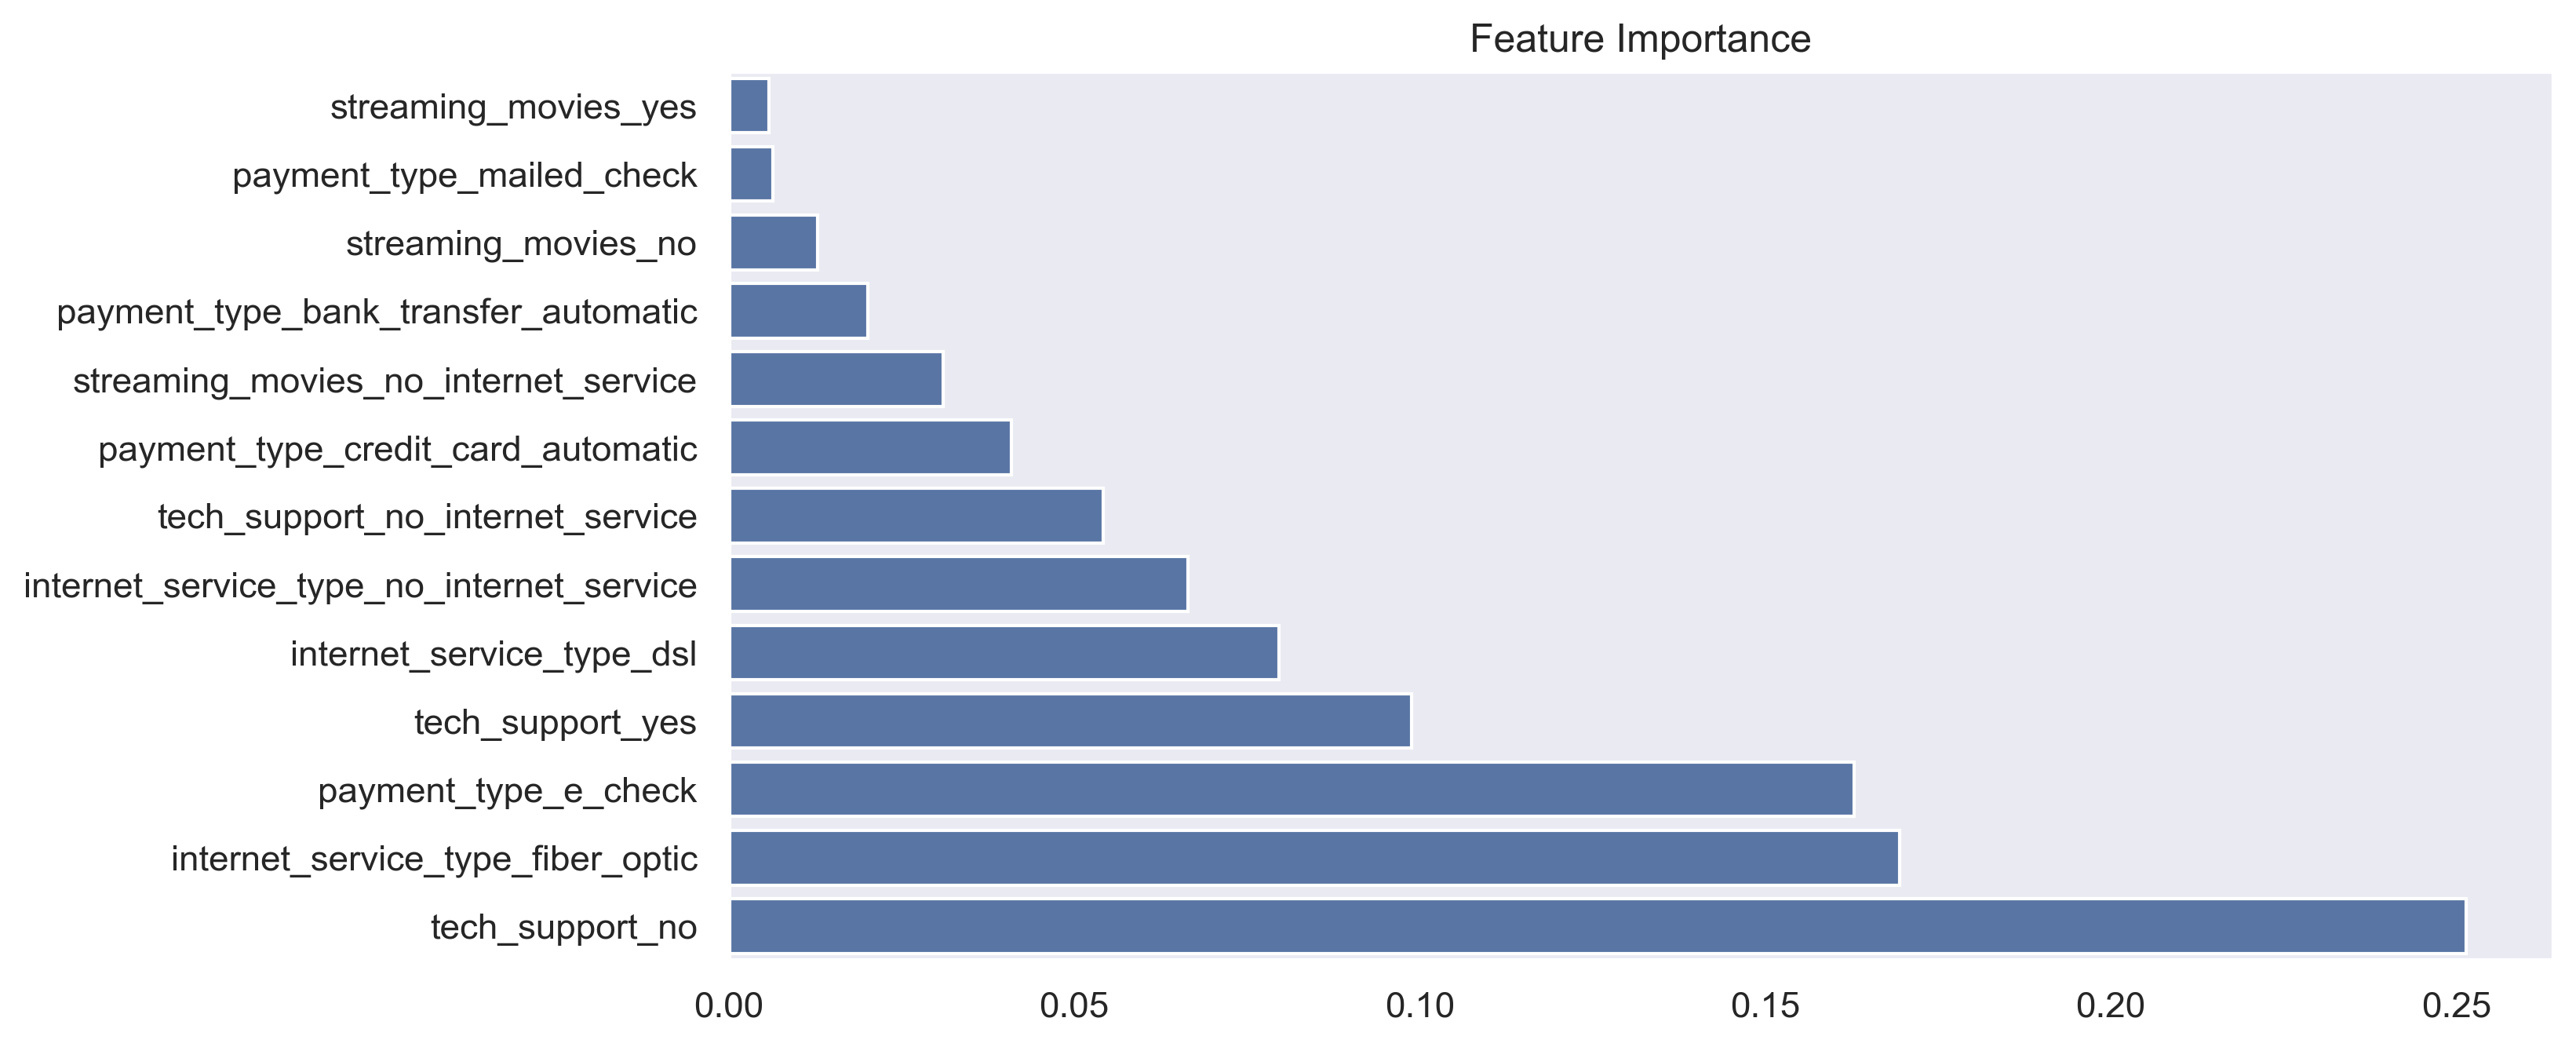

In [26]:
# by name plot of feature importance
rf = RandomForestClassifier(min_samples_leaf = 4, max_depth = 4, random_state = 123)
rf = rf.fit(X_train, y_train)

sorted_idx = rf.feature_importances_.argsort()
sns.set_theme(style = "dark")
sns.barplot(rf.feature_importances_[sorted_idx], X_train.columns[sorted_idx], orient = "h", color = "b")
plt.title("Feature Importance")
plt.show()

----
```Random Forest: Model Performance```

In [ ]:
in_sample_accuracy = rf.score(X_train, y_train)
out_of_sample_accuracy = rf.score(X_validate, y_validate)
test_accuracy = rf.score(X_test, y_test)

print(f'Train Dataset Accuracy: {in_sample_accuracy.round(3)}', "\n")
print(f"Validate Dataset Accuracy: {out_of_sample_accuracy.round(3)}", "\n")
print(f"Test Dataset Accuracy: {test_accuracy.round(3)}")

Train Dataset Accuracy: 0.768 

Validate Dataset Accuracy: 0.762 

Test Dataset Accuracy: 0.757


-----
#### ```Appendix: Model Performances```

In [ ]:
leaf_counter = 0

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 1
Random Forest with minimum sample leaves of: 1
                 False    True  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Random Forest with max_depth of: 2
Random Forest with minimum sample leaves of: 2
                 False    True  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000

Random Forest with max_depth of: 3
Random Forest with minimum sample leaves of: 3
                 False         True  accuracy    macro avg  weighted avg

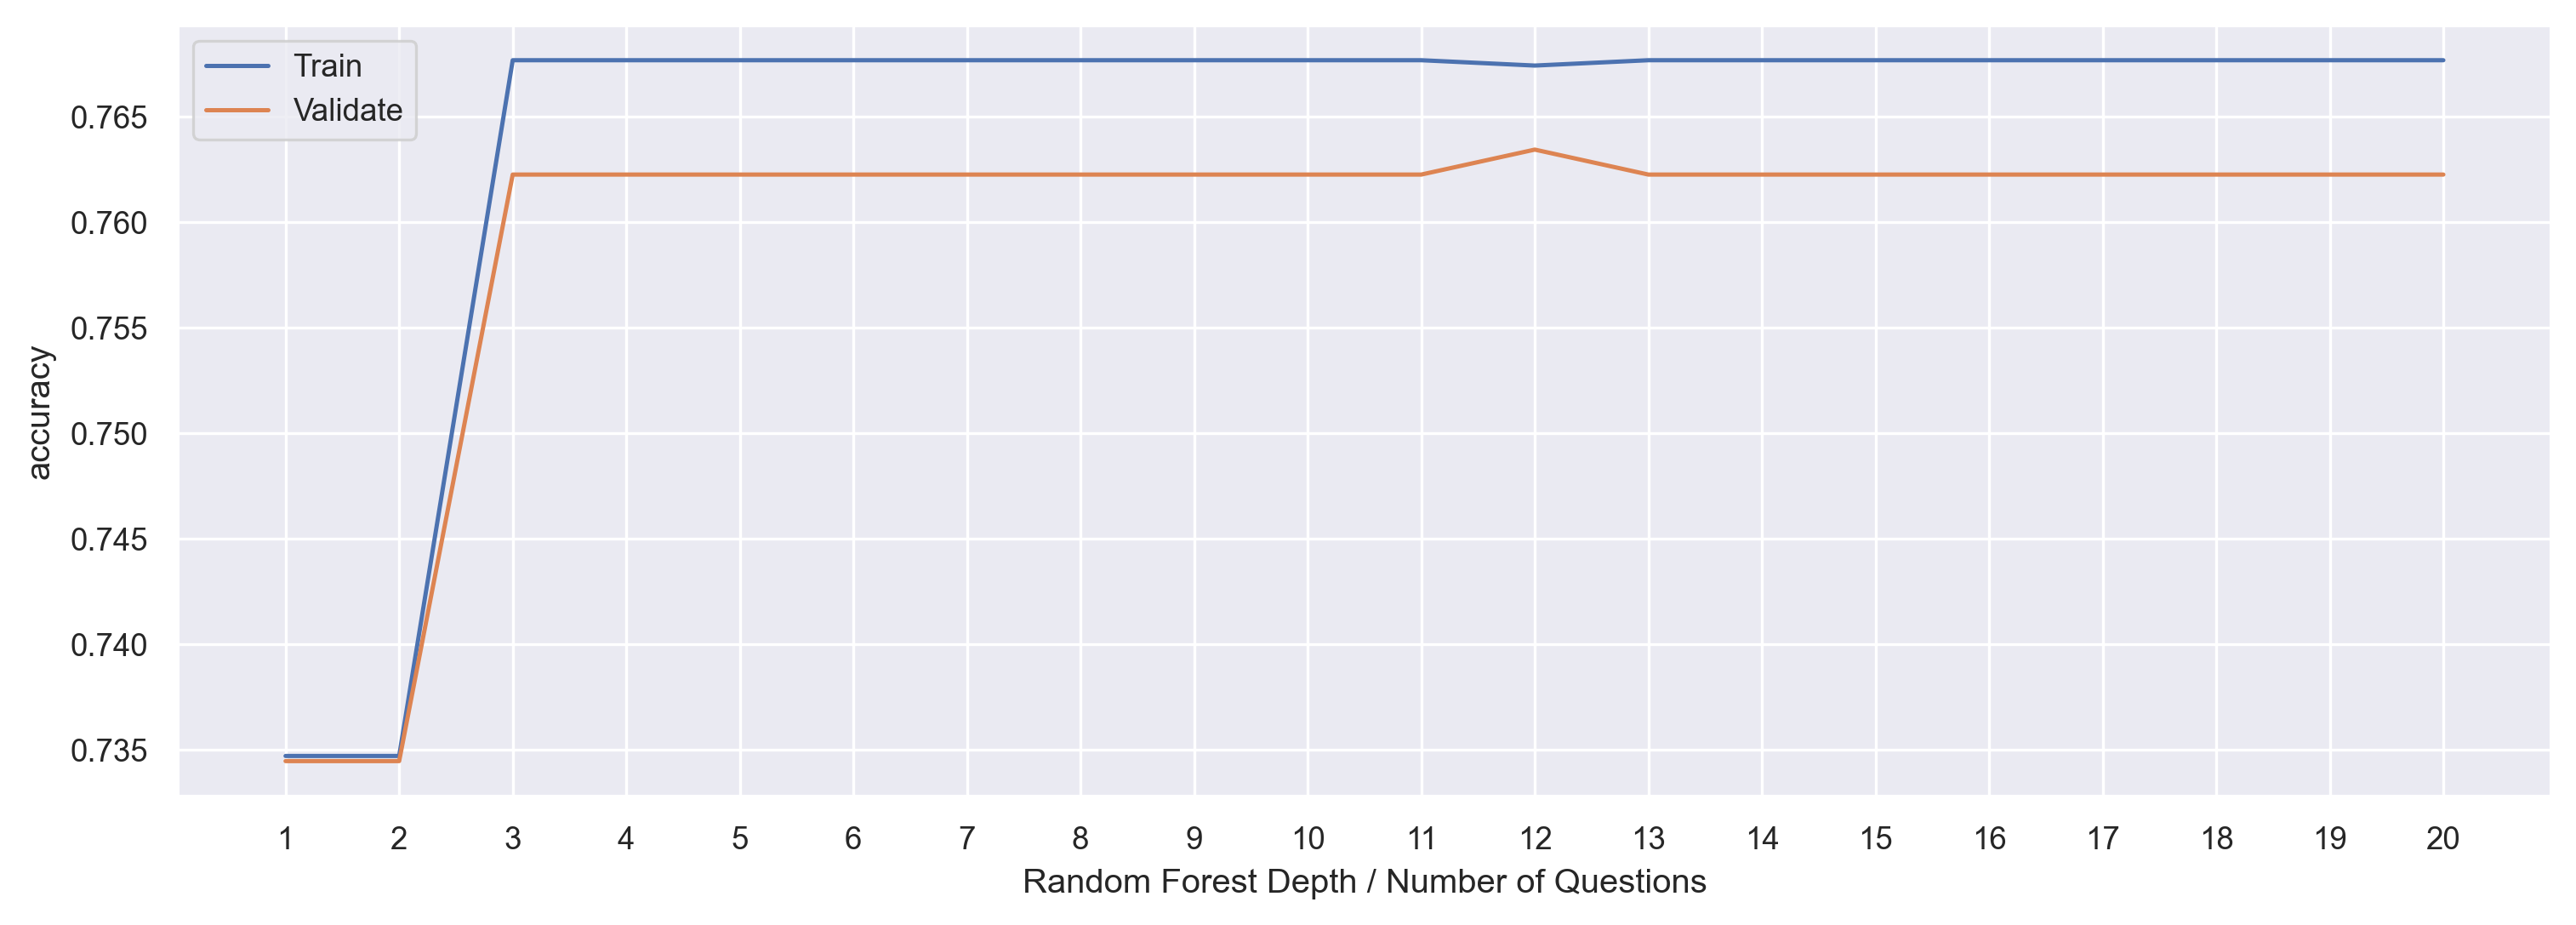

In [ ]:
# plotting the Random Forest "iteration comparison" across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []
leaf_counter = 0

for i in i_range:
    rf = RandomForestClassifier(min_samples_leaf = (leaf_counter + 1), max_depth = i)
    leaf_counter += 1
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    validate_scores.append(rf.score(X_validate, y_validate))
plt.figure(figsize=(12, 4))
plt.xlabel('Random Forest Depth / Number of Questions')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()